In [2]:
import pandas as pd

data = pd.read_csv('Data/bbni_258_01012019_11112024_detikfinance_true_false_ds-14112024-101813.csv')


In [18]:
# set max row to display
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

data

,title,category,publish_date,article_url
0,Berapa Harga Saham BBCA Hari Ini?,detikFinance,2024-11-11 12:45:00,https://finance.detik.com/bursa-dan-valas/d-7632680/berapa-harga-saham-bbca-hari-ini
1,Dua Mata Pisau Penghapusan Utang UMKM,detikFinance,2024-11-08 15:15:00,https://finance.detik.com/berita-ekonomi-bisnis/d-7628709/dua-mata-pisau-penghapusan-utang-umkm
2,"Prabowo Hapus Utang UMKM, Begini Efeknya ke Saham Perbankan",detikFinance,2024-11-06 13:44:00,https://finance.detik.com/bursa-dan-valas/d-7625075/prabowo-hapus-utang-umkm-begini-efeknya-ke-saham-perbankan
3,IHSG Hari Ini Diramal Bergerak Fluktuatif,detikFinance,2024-11-05 08:13:00,https://finance.detik.com/bursa-dan-valas/d-7622634/ihsg-hari-ini-diramal-bergerak-fluktuatif
4,"Masuk Daftar 45 Saham Pre-opening, Saham GOTO Makin Likuid?",detikFinance,2024-10-29 08:30:00,https://finance.detik.com/bursa-dan-valas/d-7610863/masuk-daftar-45-saham-pre-opening-saham-goto-makin-likuid
5,"Aset Kantor Luar Negeri BNI Tumbuh 14,55% Kuartal III 2024",detikFinance,2024-10-25 22:28:00,https://finance.detik.com/moneter/d-7606672/aset-kantor-luar-negeri-bni-tumbuh-14-55-kuartal-iii-2024
6,"BNI Salurkan Kredit Rp 735 T, Bidik Pertumbuhan 12% di Akhir 2024",detikFinance,2024-10-25 21:28:00,https://finance.detik.com/moneter/d-7606620/bni-salurkan-kredit-rp-735-t-bidik-pertumbuhan-12-di-akhir-2024
7,BNI Optimistis Bisnisnya Makin Moncer di Era Pemerintahan Baru,detikFinance,2024-10-25 20:30:00,https://finance.detik.com/moneter/d-7606593/bni-optimistis-bisnisnya-makin-moncer-di-era-pemerintahan-baru
8,"Prabowo Sudah Panggil Calon Menteri, IHSG Diprediksi Menguat ke 7.600",detikFinance,2024-10-15 08:35:00,https://finance.detik.com/market-research/d-7588272/prabowo-sudah-panggil-calon-menteri-ihsg-diprediksi-menguat-ke-7-600
9,Catat! Saham yang Bakal Cuan Hari Ini,detikFinance,2024-10-09 09:04:00,https://finance.detik.com/market-research/d-7578984/catat-saham-yang-bakal-cuan-hari-ini


In [4]:
# buat plot dari data publish_date every week
import matplotlib.pyplot as plt


In [5]:
# Define a mapping for Indonesian weekdays and months to English equivalents
indonesian_weekdays = {
    "Senin": "Monday", "Selasa": "Tuesday", "Rabu": "Wednesday",
    "Kamis": "Thursday", "Jumat": "Friday", "Sabtu": "Saturday", "Minggu": "Sunday"
}
indonesian_months = {
    "Jan": "Jan", "Feb": "Feb", "Mar": "Mar", "Apr": "Apr", "Mei": "May",
    "Jun": "Jun", "Jul": "Jul", "Agu": "Aug", "Sep": "Sep", "Okt": "Oct",
    "Nov": "Nov", "Des": "Dec"
}

# Replace Indonesian weekdays and months with English equivalents
for indo_day, eng_day in indonesian_weekdays.items():
    data['publish_date'] = data['publish_date'].str.replace(indo_day, eng_day, regex=False)
for indo_month, eng_month in indonesian_months.items():
    data['publish_date'] = data['publish_date'].str.replace(indo_month, eng_month, regex=False)


In [6]:

# Convert publish_date to datetime
data['publish_date'] = pd.to_datetime(data['publish_date'], format='%A, %d %b %Y %H:%M WIB', errors='coerce')


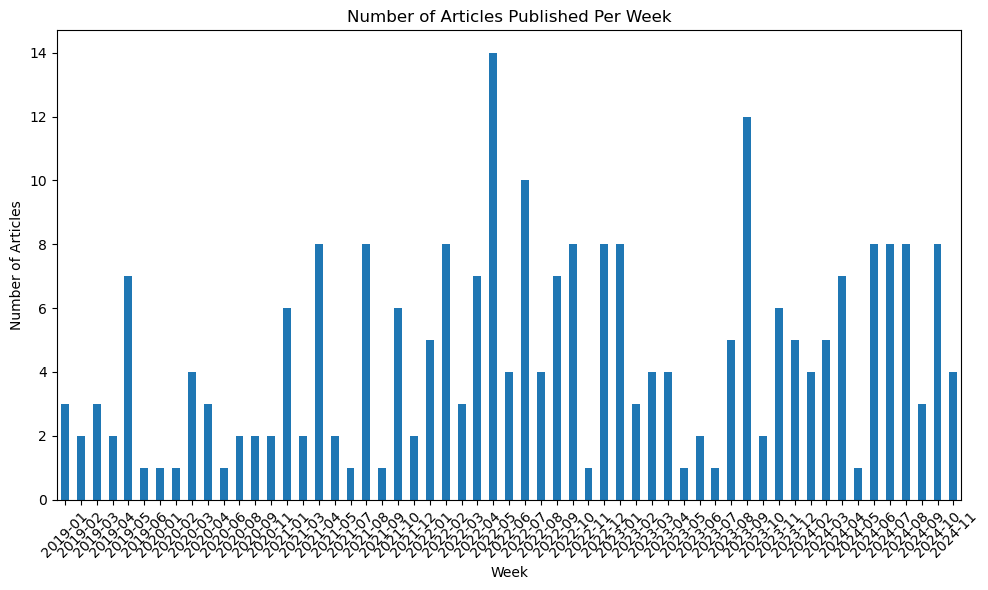

In [7]:

# Group by week and count the articles
weekly_counts = data['publish_date'].dt.to_period('M').value_counts().sort_index()

# Plotting weekly data
plt.figure(figsize=(10, 6))
weekly_counts.plot(kind='bar')
plt.title("Number of Articles Published Per Week")
plt.xlabel("Week")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
mei_2022_data = data[(data['publish_date'].dt.year == 2024) & (data['publish_date'].dt.month == 6)]
pd.set_option('display.max_colwidth', None)

mei_2022_data['title']

31                          Pasar Optimis, IHSG Masih Betah di Zona Hijau
32                   Usai Libur Panjang, IHSG Hari Ini Diprediksi Melemah
33       Top! Jumlah Investor BBRI Naik Signifikan dalam 4 Bulan Terakhir
34    Ada 'Diskon' Harga Saham, Jumlah Investor BBRI Tembus Setengah Juta
35                     IHSG Dibuka di Zona Hijau, Diramal Mantul Hari Ini
36                   IHSG Rabu Pagi Bergerak ke Zona Merah di Level 6.851
37                    IHSG Pagi Ini Bergerak ke Zona Merah di Level 6.907
38                                  Awal Pekan IHSG Dibuka ke Level 6.897
Name: title, dtype: object

226    Mau Cuan Minggu Depan? Cek Nih 6 Rekomendasi Sahamnya
227      Digeser dari Mandiri, Royke Tumilaar Jadi Dirut BNI
Name: title, dtype: object